In [71]:
import numpy as np
import pandas as pd 

from sklearn.metrics import r2_score  #评价回归预测模型的性能

import matplotlib.pyplot as plt
import seaborn as sns

# 图形出现在Notebook里而不是新窗口
%matplotlib inline

In [49]:
# path to where the data lies
dpath = '../data/'
data = pd.read_csv(dpath +"boston_housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2


In [50]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(9), int64(5)
memory usage: 55.4 KB


In [51]:
data.shape

(506, 14)

In [52]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806
std,8.601545,23.310593,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000
75%,3.677082,12.000000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
#Split the data into training data and test data
from sklearn.cross_validation import train_test_split

y= data["MEDV"]

x= data.drop("MEDV", axis=1)

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=33, test_size=0.2)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
229,0.44178,0,6.20,0,0.504,6.552,21.4,3.3751,8,307,17,380.34,3.76
296,0.05372,0,13.92,0,0.437,6.549,51.0,5.9604,4,289,16,392.85,7.39
425,15.86030,0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20,7.68,24.39
491,0.10574,0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20,390.11,18.07
418,73.53410,0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20,16.45,20.62
298,0.06466,70,2.24,0,0.400,6.345,20.1,7.8278,5,358,14,368.24,4.97
416,10.83420,0,18.10,0,0.679,6.782,90.8,1.8195,24,666,20,21.57,25.79
295,0.12932,0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16,396.90,6.27
371,9.23230,0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20,366.15,9.53
389,8.15174,0,18.10,0,0.700,5.390,98.9,1.7281,24,666,20,396.90,20.85


In [54]:
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.fit_transform(X_test)

X_train
X_test
#y_train = ss_y.fit_transform(y_train)
#y_test = ss_y.transform(y_test)

array([[-0.62466042, -0.46970677,  1.92564408, ...,  0.36236531,
         0.37381889,  0.54684218],
       [ 2.93672001, -0.46970677,  0.85700591, ...,  0.80238034,
         0.54294657,  1.68661393],
       [ 0.36832423, -0.46970677,  0.85700591, ...,  0.80238034,
        -3.00307025,  1.2379255 ],
       ...,
       [-0.01726026, -0.46970677,  0.85700591, ...,  0.80238034,
         0.54294657,  0.33539131],
       [-0.24773207, -0.46970677,  1.0664873 , ..., -1.8377098 ,
         0.13788532,  1.00068794],
       [-0.62252814, -0.46970677, -0.49329981, ...,  0.80238034,
         0.512286  , -0.08879976]])

In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr_y_predict = lr.predict(X_test)
lr_y_predict_train = lr.predict(X_train)

lr_y_predict_train

array([31.56747004, 26.53299902,  9.74957913, 13.12172362,  6.01775916,
       28.82723936, 13.38502492, 27.76898705, 25.46372008, 14.00771248,
       13.19046305, 24.07375704, 28.39735404, 23.92635281, 25.27689234,
       22.72115719, 30.50153448, 20.57278742, 26.12861621, 19.55469225,
       14.95045588, 22.78241357, 23.08583271, 13.80311359, 36.49977296,
       34.39587072, 22.27428704,  5.53959585, 26.4797341 , 22.48812319,
       25.09072384, 32.00247661, 23.19825485, 21.0653168 , 29.82949157,
       27.6369326 , 20.66428656, 23.15100462, 16.26295924, 13.36677098,
       34.59663287, 32.54096823, 16.755376  , 19.90210584, 36.25168232,
       15.58139104, 12.63972876, 13.33204104, 21.01676097, 26.2079518 ,
       34.07153181, 17.89527035, 20.30682448, 26.80250547, 16.01212839,
       18.38702136, 20.09763189, 27.25895454, 17.31644872, 23.87720418,
       20.61967948,  4.64930818, 17.69522144, 15.40325417, 25.63415032,
       36.11025955, 19.51697527, 10.5453578 , 21.53331383, 23.41

In [56]:
lr.coef_

array([-0.99387056,  1.23612637,  0.23536567,  0.76983739, -1.65322897,
        2.85084455, -0.04013672, -3.14921304,  2.74799379, -2.29414635,
       -1.7677507 ,  0.74848816, -4.04698184])

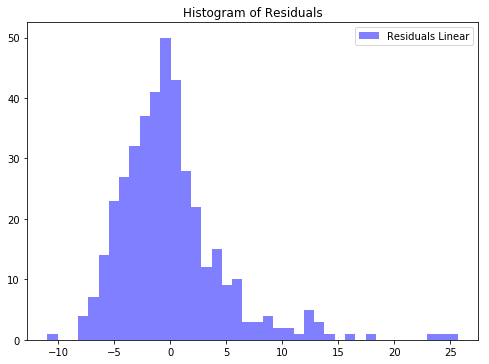

In [57]:
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

In [58]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()

sgdr.fit(X_train, y_train)

sgdr_y_predict = sgdr.predict(X_test)

sgdr_y_predict



/usr/local/python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([19.24775576, 12.46365227, 14.00689614, 19.55220351, 24.1591604 ,
       22.37651126, 37.078931  , 17.01631441, 27.04330667, 21.01249351,
       27.6652703 , 36.60071164,  7.31749728, 26.32548672, 10.6071744 ,
       25.5927754 , 19.01167868, 19.43702984, 32.91795929, 23.35594263,
       14.84170703, 19.16978123, 17.81463847, 21.08984771, 33.51429398,
       15.37819755, 26.06415825, 26.2830577 , 13.06522592, 35.14284858,
       16.72811578, 27.86950385,  5.61767426, 20.56034801, 31.56834088,
       33.1143382 , 26.52401004,  5.49413719, 20.12269956, 29.41597069,
       18.16073618, 14.76758531, 33.03258733, 15.377821  , 30.24521468,
       21.54483401, 25.81393672, 18.52845637, 26.35682221, 21.00447405,
       18.61266175, 37.3852619 , 14.83698861, 18.0096706 , 26.34399915,
       18.81851717, 27.9841211 , 14.44051162, 23.39557772, 25.28787369,
       18.44304795, 19.98763789, 36.51500922, 22.36095891, 19.337038  ,
       27.17816453, 29.14678105, -0.41906901, 15.26077826, 31.76

In [59]:
sgdr.coef_

array([-0.75488985,  0.68385174, -0.41852992,  0.88062706, -0.59708404,
        3.37010844, -0.10249874, -1.95866536,  0.75935417, -0.51702741,
       -1.64037572,  0.75960321, -3.75854311])

In [60]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print('The value of default measurement of LinearRegression on test is', lr.score(X_test, y_test))
print('The value of default measurement of LinearRegression on train is', lr.score(X_train, y_train))

# 使用SGDRegressor模型自带的评估模块，并输出评估结果
print('The value of default measurement of SGDRegressor is', sgdr.score(X_test, y_test))

The value of default measurement of LinearRegression on test is 0.6757393298161927
The value of default measurement of LinearRegression on train is 0.7451448367308487
The value of default measurement of SGDRegressor is 0.6718153423614537


In [61]:
#这里由于样本数不多，SGDRegressor不如LinearRegression。 sklearn建议样本数超过10万采用SGDRegressor

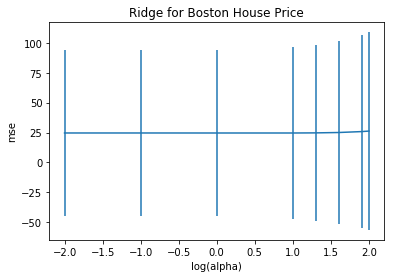

In [62]:
#岭回归／L2正则
from sklearn.linear_model import  RidgeCV

alphas = [0.01, 0.1, 1, 10,20, 40, 80,100]
reg = RidgeCV(alphas=alphas, store_cv_values=True)   
reg.fit(X_train, y_train)

# plot
mse_mean = np.mean(reg.cv_values_, axis = 0)
mse_stds = np.std(reg.cv_values_, axis = 0)

#log10 alpha values
x_axis = np.log10(alphas)

plt.errorbar(x_axis, mse_mean, yerr=mse_stds)


plt.title("Ridge for Boston House Price")
plt.xlabel( 'log(alpha)' )
plt.ylabel( 'mse' )
plt.savefig( 'RidgeCV.png' )

plt.show()

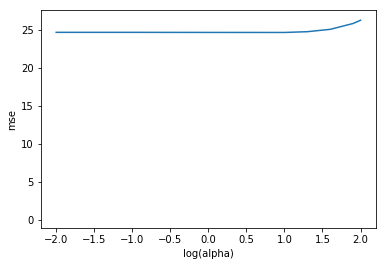

In [63]:
plt.plot(np.log10(alphas), mse_mean) 
plt.plot(np.log10(reg.alpha_)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

In [64]:
print ('alpha is:', reg.alpha_)
reg.coef_

alpha is: 10.0


array([-0.91338098,  1.06048872, -0.00646022,  0.80062233, -1.39236093,
        2.9320871 , -0.08836696, -2.84232032,  2.08929465, -1.65904941,
       -1.70789124,  0.74673226, -3.89784304])

In [65]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print('The value of default measurement of RidgeRegression is', reg.score(X_test, y_test))

The value of default measurement of RidgeRegression is 0.6782908667221441


In [66]:
#### Lasso／L1正则
from sklearn.linear_model import LassoCV

alphas = [0.01, 0.1, 1, 10,20, 30, 40,100]

lasso = LassoCV(alphas=alphas)   
lasso.fit(X_train, y_train) 

LassoCV(alphas=[0.01, 0.1, 1, 10, 20, 30, 40, 100], copy_X=True, cv=None,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

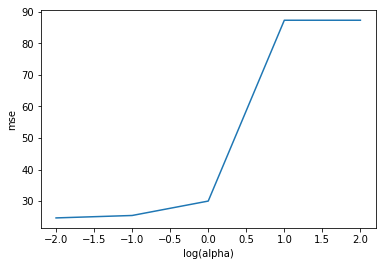

alpha is: 0.01


array([-0.96707844,  1.1920266 ,  0.14137117,  0.77109872, -1.58617935,
        2.85912382, -0.02290134, -3.08670547,  2.58137372, -2.1257124 ,
       -1.74890455,  0.73838052, -4.04814025])

In [67]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)
lasso.coef_  

In [68]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print('The value of default measurement of Lasso Regression on test is', lasso.score(X_test, y_test))
print('The value of default measurement of Lasso Regression on train is', lasso.score(X_train, y_train))

The value of default measurement of Lasso Regression on test is 0.6760535964895678
The value of default measurement of Lasso Regression on train is 0.7450680100706


In [69]:
#只用一个特征 LSTAT的线性模型
X = data.drop(data.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13]], axis = 1)

# 随机采样25%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)


# 使用默认配置初始化
lr1 = LinearRegression()

# 训练模型参数
lr1.fit(X_train, y_train)

# 预测
lr_y_predict = lr1.predict(X_test)

#显示特征的回归系数
lr1.coef_
print('The coeffie is：', lr1.coef_)

# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print('The value of default measurement of LinearRegression is on test', lr1.score(X_test, y_test))
print('The value of default measurement of LinearRegression is on train', lr1.score(X_train, y_train))


The coeffie is： [-6.88424696]
The value of default measurement of LinearRegression is on test 0.5292973354432082
The value of default measurement of LinearRegression is on train 0.5435566150244611


In [70]:
#使用两个特征：LSTAT、RM
X = data.drop(data.columns[[0,1,2,3,4,6,7,8,9,10,11,13]], axis = 1)

# 随机采样25%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

# 使用默认配置初始化
lr2 = LinearRegression()

# 训练模型参数
lr2.fit(X_train, y_train)

# 预测
lr_y_predict = lr2.predict(X_test)

#显示特征的回归系数
lr2.coef_

array([ 3.7886272 , -4.64706502])